In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

font_title = {'family':'serif','color':'black','size':18}
font_axes = {'family':'serif','color':'black','size':16}
font_ticks = {'family':'serif','color':'black','size':16}
font_legend = {'family':'serif','size':16}

chambers = {0:148.5, 1:145, 2:141.5, 3:138} # in centimeters

In [2]:
def lin(z,m,b):
    return m*z + b

def r_squared_taylor(z, C, b):
    return (C/(b**2)) - ((2*C*(z-b))/(b**3))

# lin and r_squared_taylor are "identical" in producing the same results. Can convert betweeen m, b to C, b

In [3]:
# since i don't want to include all of eta 2 in my calculation, i use a percentage based on the area produced by tanget line coming from
# source and hitting edge of chamber 3 eta 1

p = []
tan = 13.716/138
a2 = 0.5*(45.974+38.3032)*(23.495-2.032) + (2.032*45.974)
for dist in chambers.values():
    a2p = ( ( ( tan * dist ) - 13.716 ) * 45.974 )
    p.append(a2p/a2)

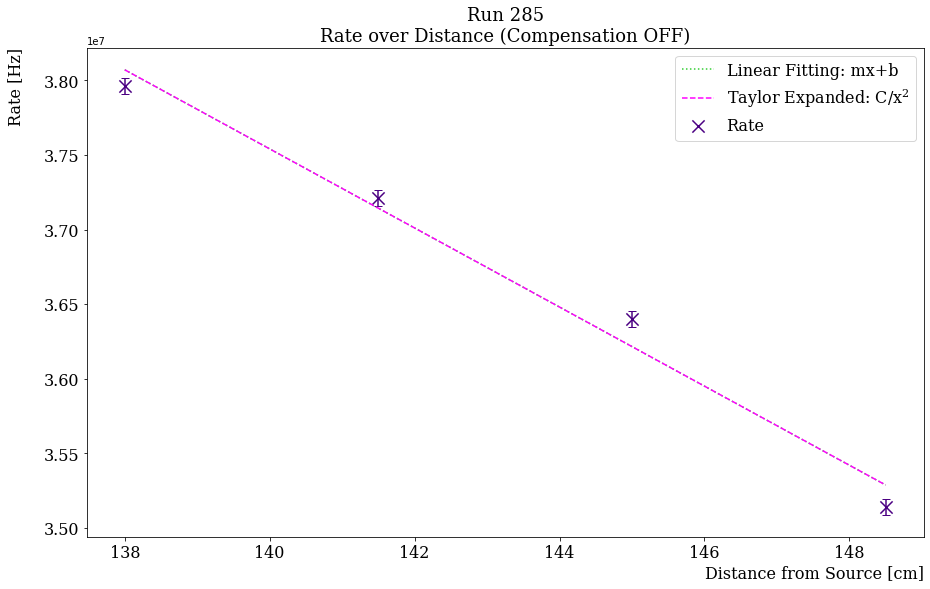

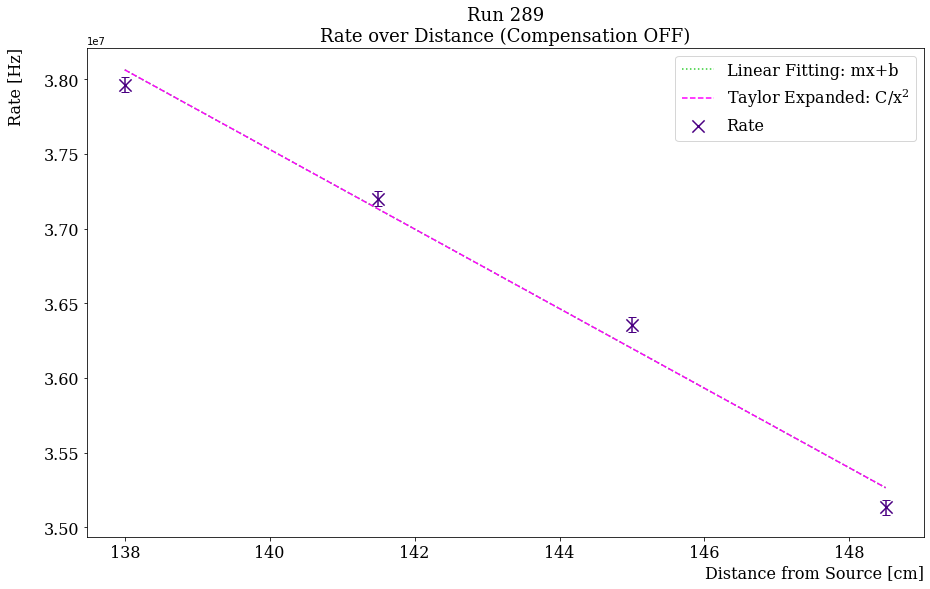

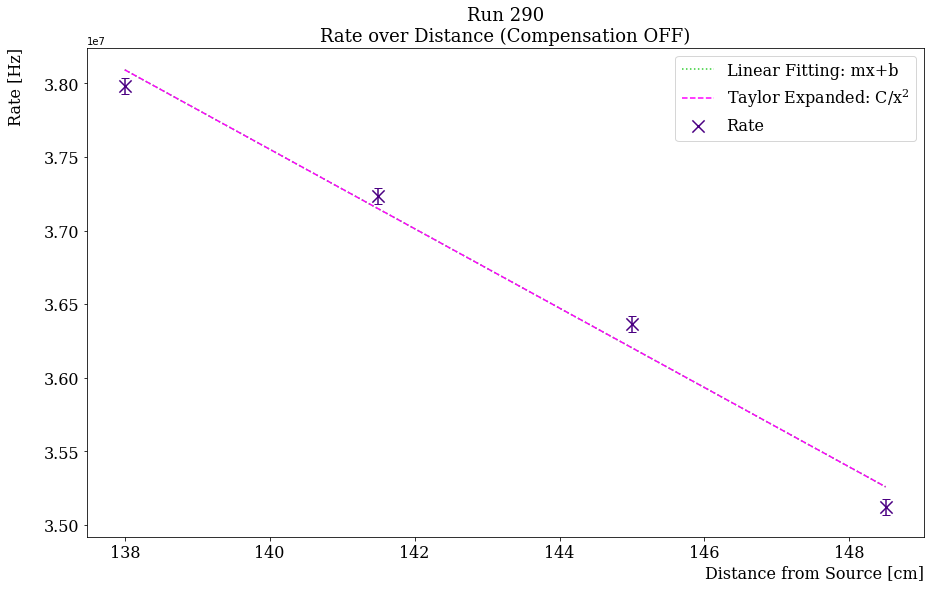

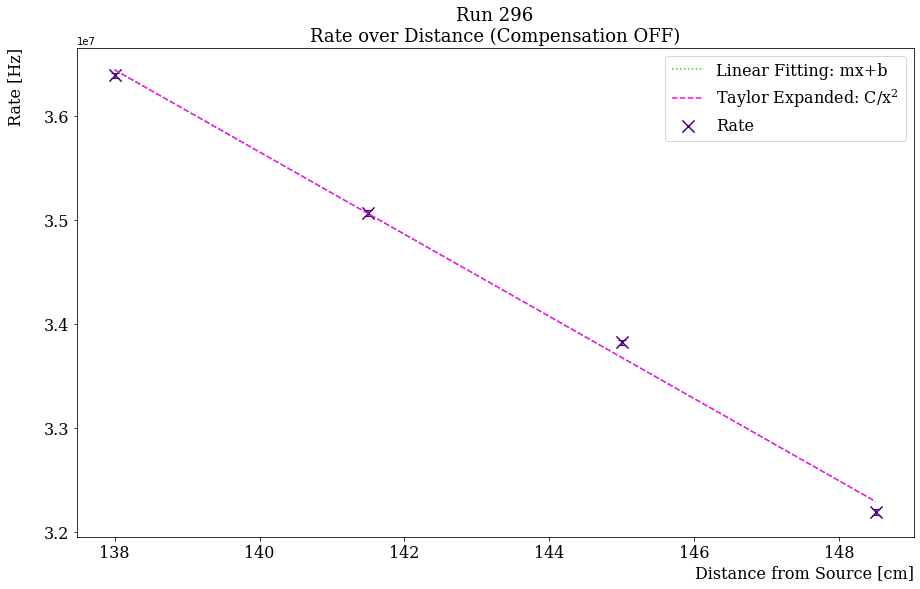

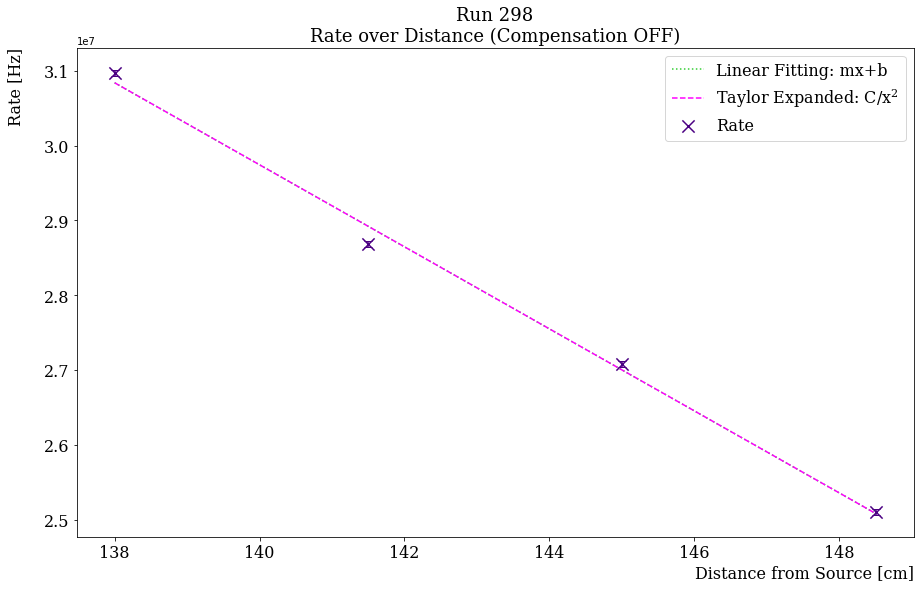

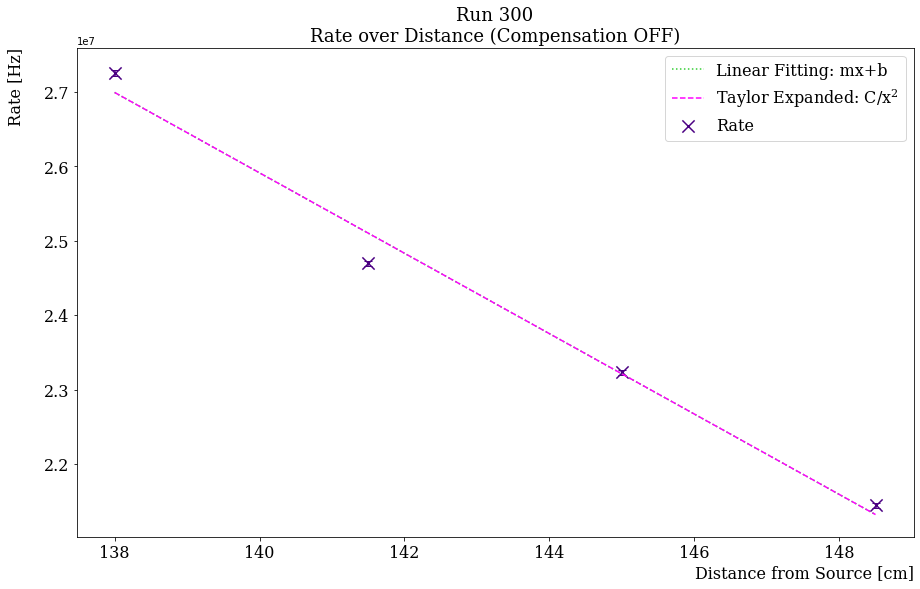

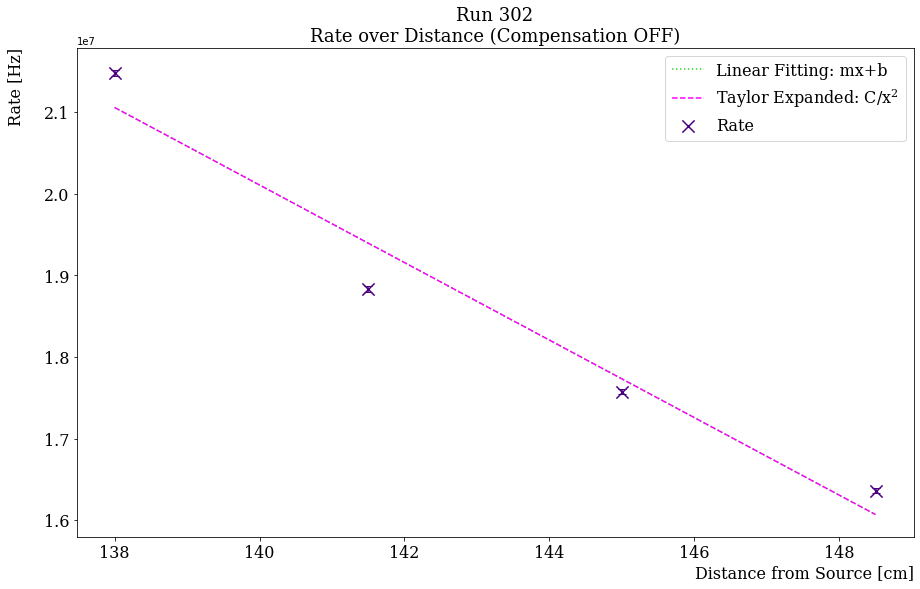

In [14]:
# COMPENSATION OFF 
run_coff = [285, 289, 290, 295, 296, 298, 300, 302, 302, 306, 308, 310]
run_coff = [285,289,290,296,298,300,302]
d_coff = {}

for run in run_coff:
    d_coff[run] = pd.read_csv("Rate_per_Eta_Run-"+str(run)+".csv")

# CSV File 
run_csv = []
slope_fit = []
slope_fit_uncert = []
y_int_fit = []
y_int_fit_uncert = []
C_fit = []
C_fit_uncert = []
b_fit = []
b_fit_uncert = []
    
for run in d_coff.keys():
    
    run_csv.append(run)
    
    temp = {}
    temp_1 = {}

    for ch in chambers.keys():
        
        data = d_coff[run]
        
        cut1 = data["Chamber"] == ch
        cut2 = data["Eta"] == 1
        cut3 = data["Eta"] == 2
        cut = np.logical_and(cut1, cut2)
        cut_p = np.logical_and(cut1, cut3)
        
        temp[ chambers[ch] ] = (np.array((data["Rate"][cut]))+np.array(p[ch]*data["Rate"][cut_p]))[0]
        temp_1[ chambers[ch] ] = (np.array((data["Error"][cut]))+np.array(p[ch]*data["Error"][cut_p]))[0]
            
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(15, 9)
    
    x = np.array(list(temp.keys()))
    y = np.array(list(temp.values()))
    y_err = np.array(list(temp_1.values()))
    
    plt.scatter( x, y, marker = 'x', s = 150, color = 'indigo', label = "Rate")
    plt.errorbar( x, y, yerr = y_err, linestyle='',capsize=4,ecolor='indigo')
    
    slope = (min(y)-max(y))/(max(x)-min(x))
    x_fitting = np.linspace(min(x),max(x),500)

    # simple linear fitting
    try:
        guess = [slope, max(y) - (slope * min(x))]
        i = 0
        while i < 5:
            para, cov = curve_fit(lin,x,y,p0=guess)
            guess = para
            i += 1
        plt.plot(x_fitting,lin(x_fitting,para[0],para[1]),color='limegreen',linestyle='dotted',label="Linear Fitting: mx+b")
        slope_fit.append(para[0])
        y_int_fit.append(para[1])
        slope_fit_uncert.append(np.sqrt(cov[0][0]))
        y_int_fit_uncert.append(np.sqrt(cov[1][1]))
    except:
        print("ERROR with linear fitting")
        slope_fit.append(-404)
        y_int_fit.append(-404)
        slope_fit_uncert.append(-404)
        y_int_fit_uncert.append(-404)

    # taylor fitting
    try:
        bee = np.average(x)
        guess = [(-slope * (bee**3)) / 2, np.average(x)]
        i=0
        while i < 5:
            para, cov = curve_fit(r_squared_taylor,x,y,p0=guess)
            guess = para
            i+=1
        plt.plot(x_fitting,r_squared_taylor(x_fitting,para[0],para[1]), color = 'fuchsia', linestyle='--',label="Taylor Expanded: C/$\mathregular{x^{2}}$") 
        C_fit.append(para[0])
        b_fit.append(para[1])
        C_fit_uncert.append(np.sqrt(cov[0][0]))
        b_fit_uncert.append(np.sqrt(cov[1][1]))
    except:
        print("ERROR with Taylor expansion fitting")
        C_fit.append(-404)
        b_fit.append(-404)
        C_fit_uncert.append(-404)
        b_fit_uncert.append(-404)
        
    plt.xlabel('Distance from Source [cm]', loc = 'right',fontdict = font_axes)
    plt.xticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.ylabel('Rate [Hz]', loc = 'top', fontdict = font_axes, labelpad = 20)
    ax.set_title("Run "+str(run)+"\nRate over Distance (Compensation OFF)", fontdict = font_title)    
    
    plt.legend(prop = {'family':'serif','size':16})     
    
    plt.savefig("Rate_vs_Ditstance_Run_"+str(run)+"_COMP-OFF.png")
    
    plt.show()
    plt.close()
    
df = {"Run":run_csv,"Linear Slope":slope_fit,"Linear Slope Error":slope_fit_uncert,"Linear Y-Int":y_int_fit,"Linear Y-Int Error":y_int_fit_uncert,"Taylor Constant":C_fit,"Taylor Contstant Error":C_fit_uncert,"Taylor Fitted Point":b_fit,"Taylor Fitted Point Error":b_fit_uncert}
pd.DataFrame(df).to_csv("Rate_vs_Distance_Linear_and_Taylor-Expanded_Fits_Compensation_Off.csv", index = False, header = True)

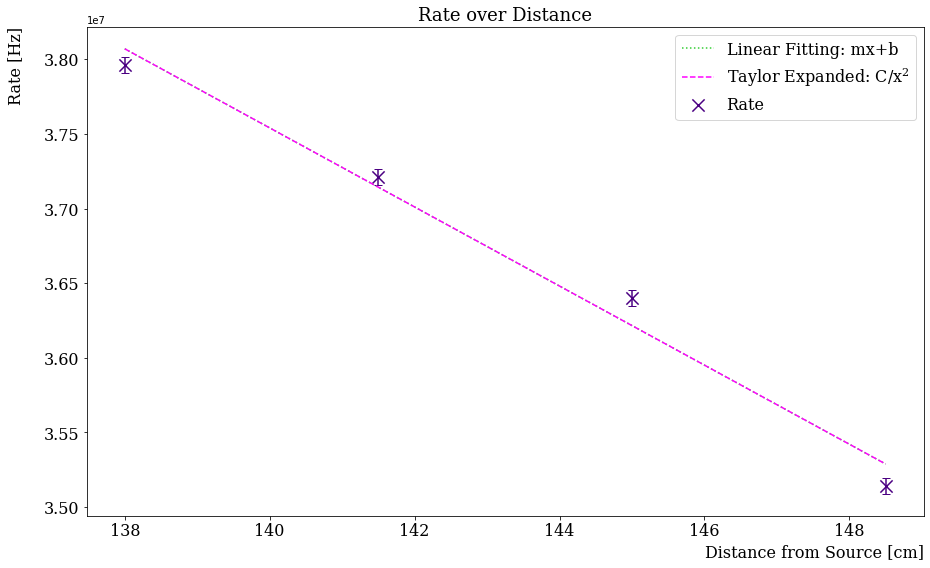

In [4]:
# COMPENSATION OFF 
run_coff = [285, 289, 290, 295, 296, 298, 300, 302, 302, 306, 308, 310]
run_coff = [285]
d_coff = {}

for run in run_coff:
    d_coff[run] = pd.read_csv("Rate_per_Eta_Run-"+str(run)+".csv")

# CSV File 
run_csv = []
slope_fit = []
slope_fit_uncert = []
y_int_fit = []
y_int_fit_uncert = []
C_fit = []
C_fit_uncert = []
b_fit = []
b_fit_uncert = []
    
for run in d_coff.keys():
    
    run_csv.append(run)
    
    temp = {}
    temp_1 = {}

    for ch in chambers.keys():
        
        data = d_coff[run]
        
        cut1 = data["Chamber"] == ch
        cut2 = data["Eta"] == 1
        cut3 = data["Eta"] == 2
        cut = np.logical_and(cut1, cut2)
        cut_p = np.logical_and(cut1, cut3)
        
        temp[ chambers[ch] ] = (np.array((data["Rate"][cut]))+np.array(p[ch]*data["Rate"][cut_p]))[0]
        temp_1[ chambers[ch] ] = (np.array((data["Error"][cut]))+np.array(p[ch]*data["Error"][cut_p]))[0]
            
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(15, 9)
    
    x = np.array(list(temp.keys()))
    y = np.array(list(temp.values()))
    y_err = np.array(list(temp_1.values()))
    
    plt.scatter( x, y, marker = 'x', s = 150, color = 'indigo', label = "Rate")
    plt.errorbar( x, y, yerr = y_err, linestyle='',capsize=4,ecolor='indigo')
    
    slope = (min(y)-max(y))/(max(x)-min(x))
    x_fitting = np.linspace(min(x),max(x),500)

    # simple linear fitting
    try:
        guess = [slope, max(y) - (slope * min(x))]
        i = 0
        while i < 5:
            para, cov = curve_fit(lin,x,y,p0=guess)
            guess = para
            i += 1
        plt.plot(x_fitting,lin(x_fitting,para[0],para[1]),color='limegreen',linestyle='dotted',label="Linear Fitting: mx+b")
        slope_fit.append(para[0])
        y_int_fit.append(para[1])
        slope_fit_uncert.append(np.sqrt(cov[0][0]))
        y_int_fit_uncert.append(np.sqrt(cov[1][1]))
    except:
        print("ERROR with linear fitting")
        slope_fit.append(-404)
        y_int_fit.append(-404)
        slope_fit_uncert.append(-404)
        y_int_fit_uncert.append(-404)

    # taylor fitting
    try:
        bee = np.average(x)
        guess = [(-slope * (bee**3)) / 2, np.average(x)]
        i=0
        while i < 5:
            para, cov = curve_fit(r_squared_taylor,x,y,p0=guess)
            guess = para
            i+=1
        plt.plot(x_fitting,r_squared_taylor(x_fitting,para[0],para[1]), color = 'fuchsia', linestyle='--',label="Taylor Expanded: C/$\mathregular{x^{2}}$") 
        C_fit.append(para[0])
        b_fit.append(para[1])
        C_fit_uncert.append(np.sqrt(cov[0][0]))
        b_fit_uncert.append(np.sqrt(cov[1][1]))
    except:
        print("ERROR with Taylor expansion fitting")
        C_fit.append(-404)
        b_fit.append(-404)
        C_fit_uncert.append(-404)
        b_fit_uncert.append(-404)
        
    plt.xlabel('Distance from Source [cm]', loc = 'right',fontdict = font_axes)
    plt.xticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.ylabel('Rate [Hz]', loc = 'top', fontdict = font_axes, labelpad = 20)
    ax.set_title("Rate over Distance", fontdict = font_title)    
    
    plt.legend(prop = {'family':'serif','size':16})     
    
    plt.savefig("Rate_vs_Ditstance_Run_"+str(run)+"_COMP-OFF.png")
    
    plt.show()
    plt.close()

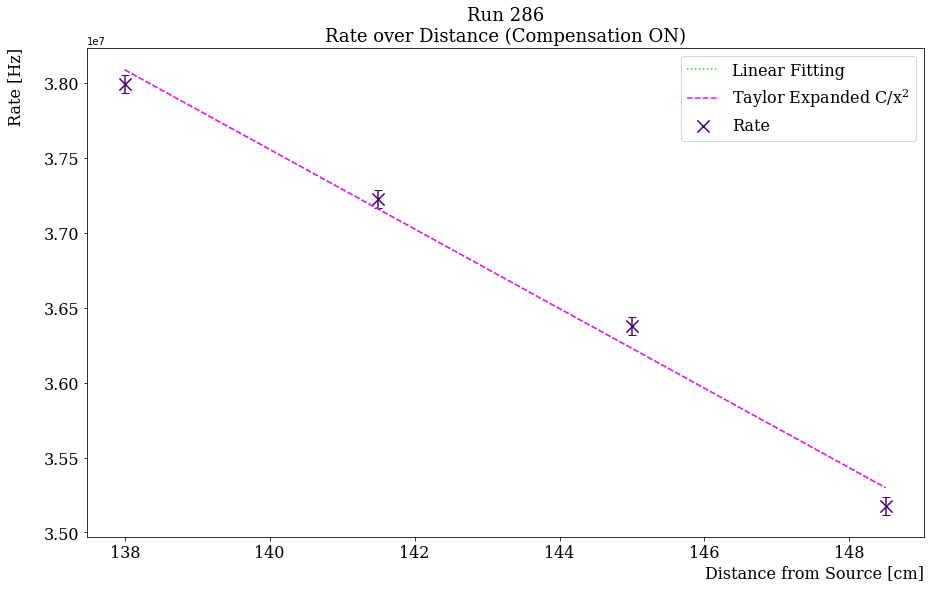

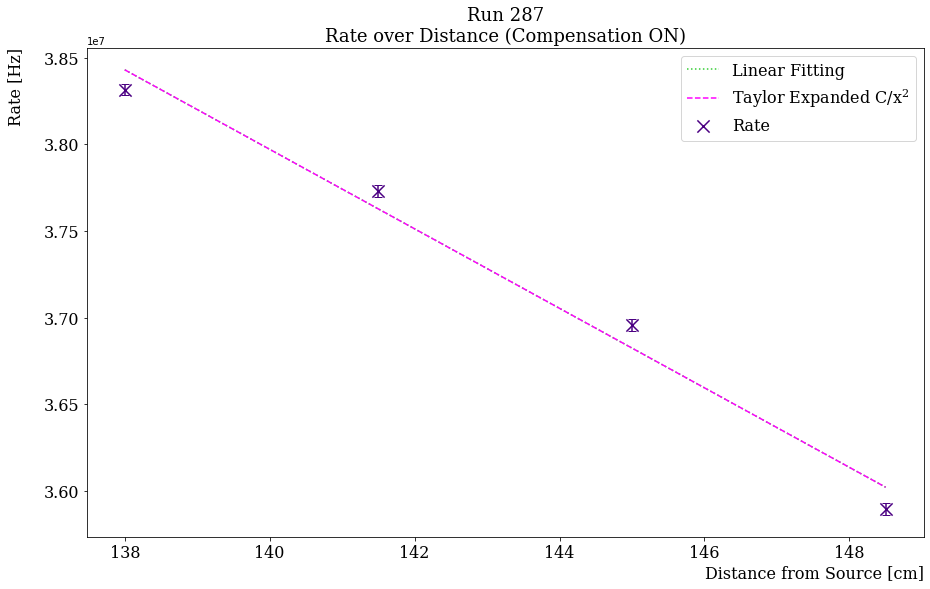

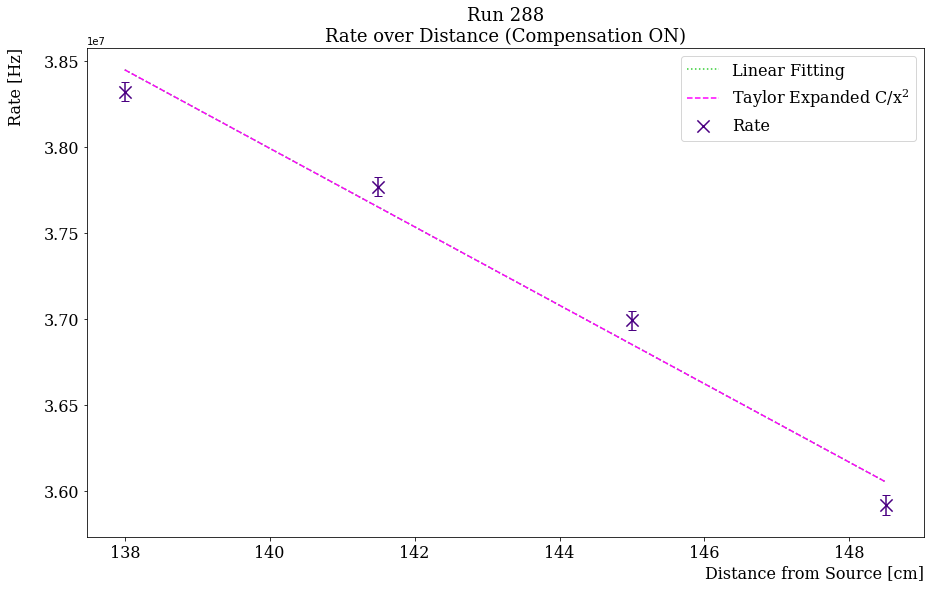

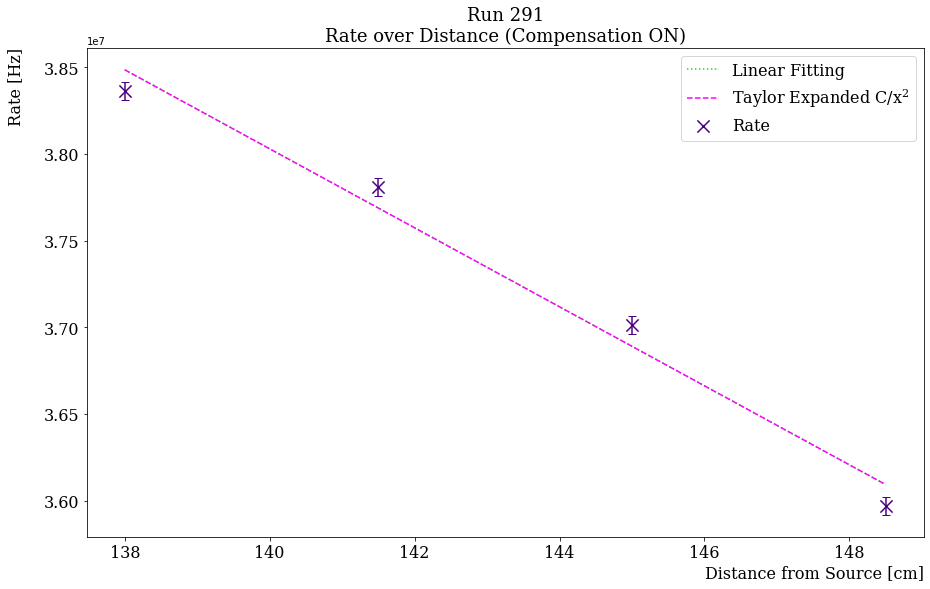

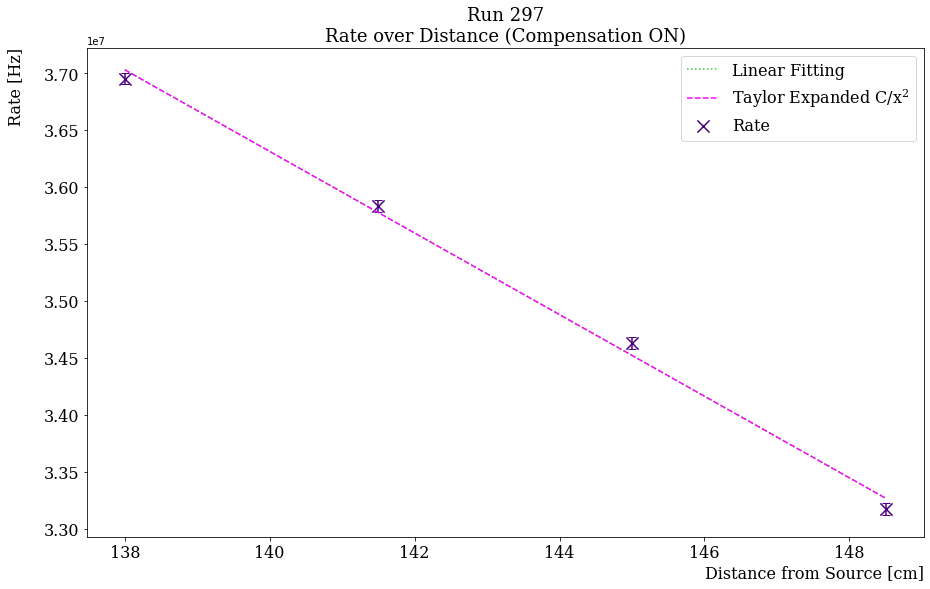

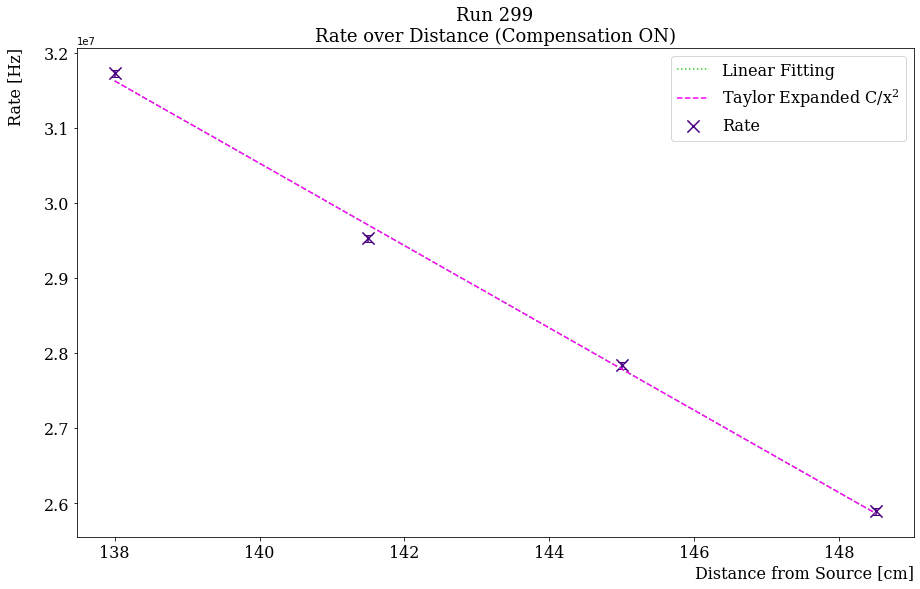

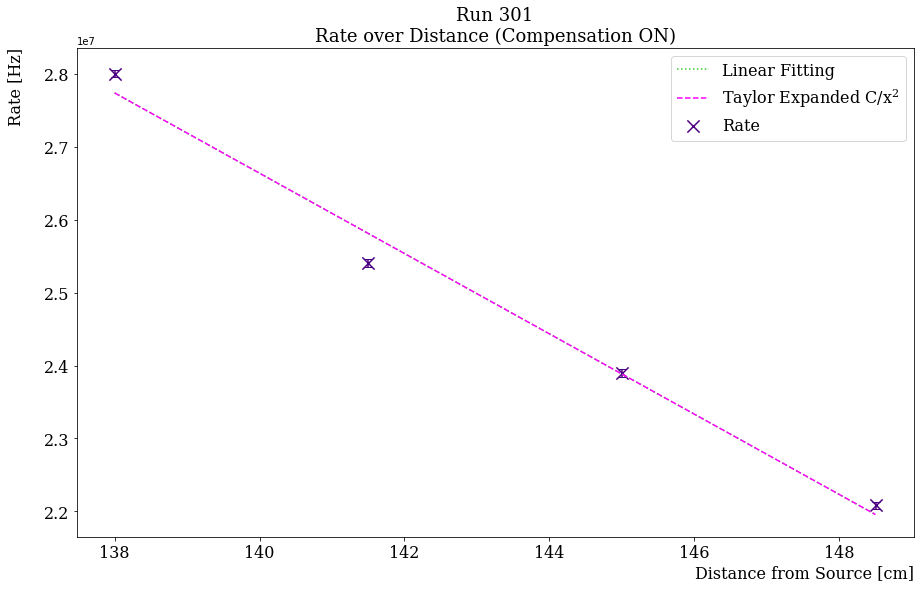

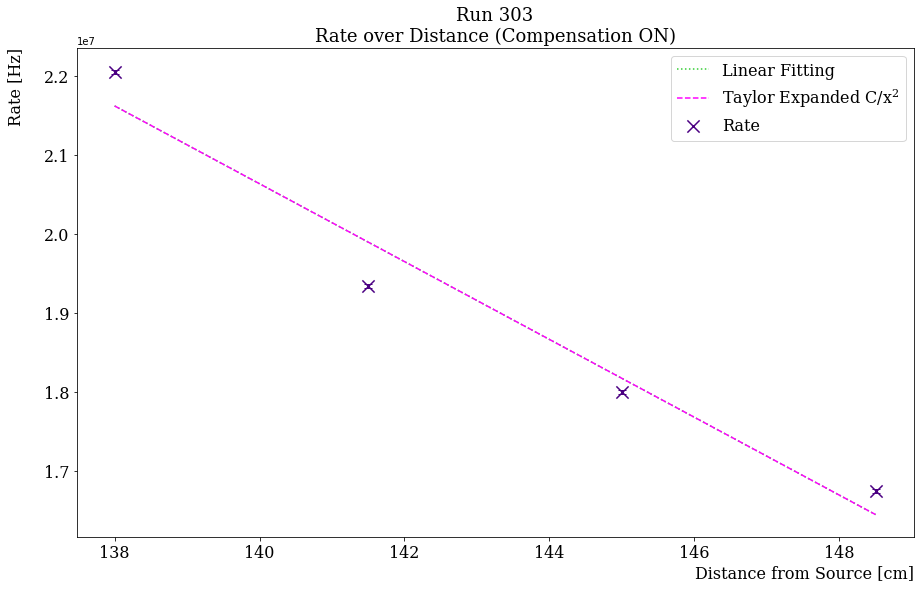

In [15]:
# COMPENSATION ON
run_con = [286, 287, 288, 291, 293, 294, 297, 299, 301, 303, 305, 307, 309, 311]
run_con = [286,287,288,291,297,299,301,303]
d_con = {}

for run in run_con:
    d_con[run] = pd.read_csv("Rate_per_Eta_Run-"+str(run)+".csv")

# CSV File 
run_csv = []
slope_fit = []
slope_fit_uncert = []
y_int_fit = []
y_int_fit_uncert = []
C_fit = []
C_fit_uncert = []
b_fit = []
b_fit_uncert = []
    
for run in d_con.keys():
    
    run_csv.append(run)
    
    temp = {}
    temp_1 = {}

    for ch in chambers.keys():
        
        data = d_con[run]
        
        cut1 = data["Chamber"] == ch
        cut2 = data["Eta"] == 1
        cut3 = data["Eta"] == 2
        cut = np.logical_and(cut1, cut2)
        cut_p = np.logical_and(cut1, cut3)
        
        temp[ chambers[ch] ] = (np.array((data["Rate"][cut]))+np.array(p[ch]*data["Rate"][cut_p]))[0]
        temp_1[ chambers[ch] ] = (np.array((data["Error"][cut]))+np.array(p[ch]*data["Error"][cut_p]))[0]
            
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(15, 9)
    
    x = np.array(list(temp.keys()))
    y = np.array(list(temp.values()))
    y_err = np.array(list(temp_1.values()))
    
    plt.scatter( x, y, marker = 'x', s = 150, color = 'indigo', label = "Rate")
    plt.errorbar( x, y, yerr = y_err, linestyle='',capsize=4,ecolor='indigo')
    
    slope = (min(y)-max(y))/(max(x)-min(x))
    x_fitting = np.linspace(min(x),max(x),500)

    # simple linear fitting
    try:
        guess = [slope, max(y) - (slope * min(x))]
        i = 0
        while i < 5:
            para, cov = curve_fit(lin,x,y,p0=guess)
            guess = para
            i += 1
        plt.plot(x_fitting,lin(x_fitting,para[0],para[1]),color='limegreen',linestyle='dotted',label="Linear Fitting")
        slope_fit.append(para[0])
        y_int_fit.append(para[1])
        slope_fit_uncert.append(np.sqrt(cov[0][0]))
        y_int_fit_uncert.append(np.sqrt(cov[1][1]))
    except:
        print("ERROR with linear fitting")
        slope_fit.append(-404)
        y_int_fit.append(-404)
        slope_fit_uncert.append(-404)
        y_int_fit_uncert.append(-404)

    # taylor fitting
    try:
        bee = np.average(x)
        guess = [(-slope * (bee**3)) / 2, np.average(x)]
        i=0
        while i < 5:
            para, cov = curve_fit(r_squared_taylor,x,y,p0=guess)
            guess = para
            i+=1
        plt.plot(x_fitting,r_squared_taylor(x_fitting,para[0],para[1]), color = 'fuchsia', linestyle='--',label="Taylor Expanded C/$\mathregular{x^{2}}$") 
        C_fit.append(para[0])
        b_fit.append(para[1])
        C_fit_uncert.append(np.sqrt(cov[0][0]))
        b_fit_uncert.append(np.sqrt(cov[1][1]))
    except:
        print("ERROR with Taylor expansion fitting")
        C_fit.append(-404)
        b_fit.append(-404)
        C_fit_uncert.append(-404)
        b_fit_uncert.append(-404)
        
    plt.xlabel('Distance from Source [cm]', loc = 'right',fontdict = font_axes)
    plt.xticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.ylabel('Rate [Hz]', loc = 'top', fontdict = font_axes, labelpad = 20)
    ax.set_title("Run "+str(run)+"\nRate over Distance (Compensation ON)", fontdict = font_title)    
    
    plt.legend(prop = {'family':'serif','size':16})     
    
    plt.savefig("Rate_vs_Ditstance_Run_"+str(run)+"_COMP-ON.png")
    
    plt.show()
    plt.close()
    
df = {"Run":run_csv,"Linear Slope":slope_fit,"Linear Slope Error":slope_fit_uncert,"Linear Y-Int":y_int_fit,"Linear Y-Int Error":y_int_fit_uncert,"Taylor Constant":C_fit,"Taylor Contstant Error":C_fit_uncert,"Taylor Fitted Point":b_fit,"Taylor Fitted Point Error":b_fit_uncert}
pd.DataFrame(df).to_csv("Rate_vs_Distance_Linear_and_Taylor-Expanded_Fits_Compensation_On.csv", index = False, header = True)